In [154]:
import numpy as np
import matplotlib.pyplot as plt
from stats import*
from funcs import*

Punto1

In [155]:
def rand_TCL_unif(xmin,xmax,N):
    
    return np.average([np.random.uniform(xmin,xmax) for i in range(N)])

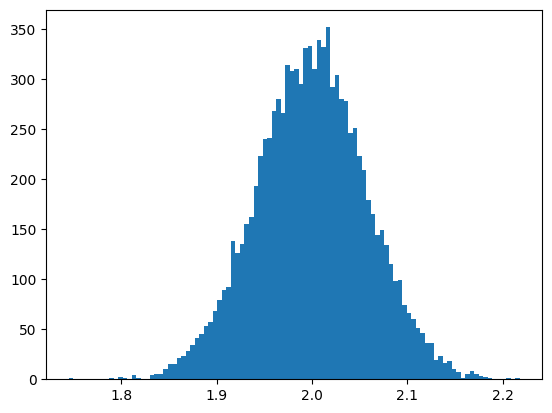

In [156]:
data_unif = [rand_TCL_unif(1,3,100) for i in range(10000)]
# print(np.min(data), np.max(data))
# print(np.mean(data), np.std(data))
plt.hist(data_unif,bins=100)
plt.show()

Punto 2

In [157]:
def f(x):
    return -np.power((x-2),2) + 1

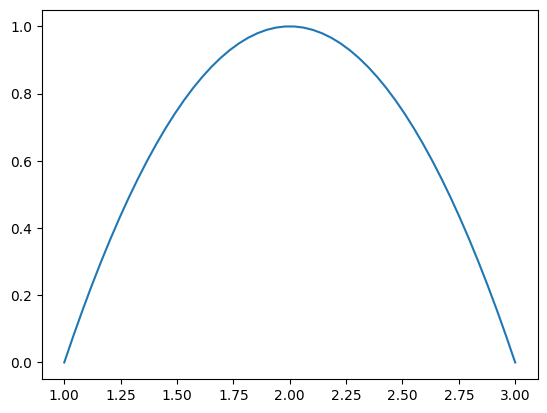

In [158]:
xmin,xmax = 1,3
x = np.linspace(xmin,xmax)
y = [f(i) for i in x]
plt.plot(x,y)
plt.show()

In [159]:
def rand_TAC(xmin,xmax,ymax,*args,**kwargs):
    
    x = np.random.uniform(xmin,xmax)
    y = np.random.uniform(0,ymax)
    if f(x,*args,**kwargs) < y:
        return rand_TAC(xmin,xmax,ymax)
    return x

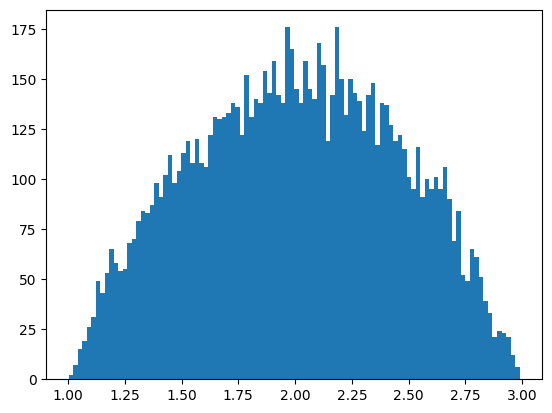

In [160]:
xmin,xmax = 1,3
xxx, ymax = max_sez_aurea(f,xmin,xmax)
data_TAC = [rand_TAC(xmin,xmax,ymax) for i in range(10000)]
plt.hist(data_TAC,bins=100)
plt.show()

Punto 3

In [161]:
def rand_TCL_para(xmin,xmax,ymax,N):
    return np.average([rand_TAC(xmin,xmax,ymax) for i in range(N)])

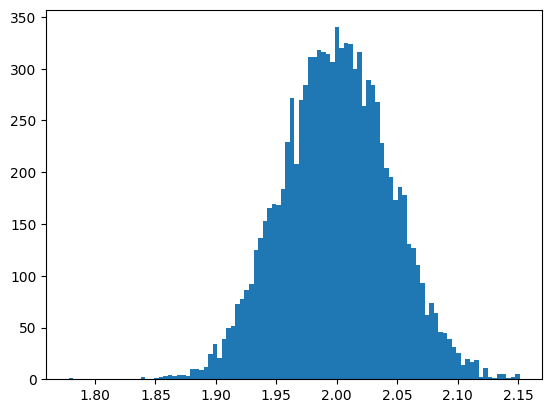

In [162]:
data_TCL_para = [rand_TCL_para(1,3,1,100) for i in range(10000)]
# print(np.min(data_TCL_para), np.max(data_TCL_para))
# print(np.mean(data_TCL_para), np.std(data_TCL_para))
plt.hist(data_TCL_para,bins=100)
plt.show()

Punto 4 

In [163]:
print("m,v,skewness,kurtosis =",stat(data_unif))
print("m,v,skewness,kurtosis =",stat(data_TAC))
print("m,v,skewness,kurtosis =",stat(data_TCL_para))

m,v,skewness,kurtosis = (1.9995562623781873, 0.0032803949911045386, -0.008378901646974347, 2.989874669357006)
m,v,skewness,kurtosis = (2.004526340780982, 0.1991423627196445, -0.03509281673728827, 2.148958442310893)
m,v,skewness,kurtosis = (1.9997312821196682, 0.0019931115985895175, 0.0033468799239526493, 2.9536707341846573)


Punto 5

In [178]:
def andamento(f,xs,*args):
    s,k = [],[]
    for i in xs:
        data = [rand_TCL_unif(*args) for j in range(1,i+1)]
        s.append(skewness(data))
        k.append(kurtosis(data))
    return s,k

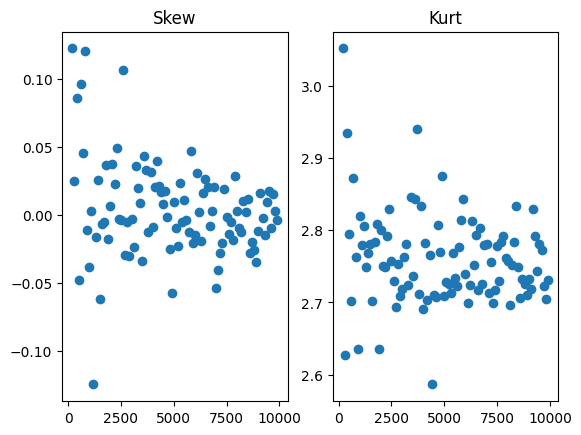

In [184]:
N = 10000
xs = np.arange(200,N,100)
range(N)
s,k = andamento(rand_TCL_unif,xs,xmin,xmax,5)

fig,ax = plt.subplots(1,2)
ax[0].scatter(xs,s)
ax[1].scatter(xs,k)
ax[0].set_title("Skew")
ax[1].set_title("Kurt")
plt.show()

In [ ]:
N = 10000
xs = np.arange(200,N,100)
range(N)
s,k = andamento(rand_TCL_para,xs,xmin,xmax,5)

fig,ax = plt.subplots(1,2)
ax[0].scatter(xs,s)
ax[1].scatter(xs,k)
ax[0].set_title("Skew")
ax[1].set_title("Kurt")
plt.show()